Certainly! Let's explore **change points** in time series forecasting and how to detect them using Python. 📈

### What are Change Points?

A **change point** (also known as a structural break) refers to a moment in a time series where the underlying data-generating process shifts significantly. These shifts can occur due to various reasons, such as changes in trends, seasonality, or external events. Detecting change points is essential for understanding shifts in patterns and making accurate forecasts.

### Why Detect Change Points?

1. **Identifying Regime Shifts:**
   - Change points help identify when the behavior of a time series changes.
   - For example, a sudden increase in sales or a shift in stock market volatility.

2. **Adaptive Forecasting:**
   - By detecting change points, we can adapt our forecasting models accordingly.
   - Different models may be needed for different segments of the time series.

### Python Example: Change Point Detection

Let's use the `ruptures` library to detect change points in a synthetic time series. First, install the library using `pip install ruptures`.

In this example:
- We generate synthetic data with a change point (mean shifts from 10 to 20).
- The `ruptures` library detects the change point using linear regression.
- Detected change points are shown as red dashed lines.

Feel free to apply this technique to your own time series data! 🔄📊

For more details, you can refer to the following resources:
- [Change Point Detection with Python (ruptures)](https://centre-borelli.github.io/ruptures-docs/) ¹
- [Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/) ²
- [Make Predictions for Time Series Forecasting with Python](https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/) ³

Source: Conversation with Bing, 16/5/2024
(1) ARIMA Model – Complete Guide to Time Series Forecasting in Python. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/.
(2) Time Series Analysis in Python – A Comprehensive Guide with Examples. https://www.machinelearningplus.com/time-series/time-series-analysis-python/.
(3) How to Make Predictions for Time Series Forecasting with Python. https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/.
(4) undefined. https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv.
(5) undefined. https://raw.githubusercontent.com/selva86/datasets/master/a10.csv.

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from ruptures import rpt

# # Generate synthetic time series with a change point
# np.random.seed(42)
# n = 200
# time = np.arange(n)
# values = np.concatenate([np.random.normal(10, 1, n // 2), np.random.normal(20, 1, n // 2)])

# # Detect change points
# model = "l2"  # Use linear regression for change point detection
# algo = rpt.Pelt(model=model).fit(values)
# result = algo.predict(pen=10)

# # Plot the time series and detected change points
# plt.figure(figsize=(8, 4))
# plt.plot(time, values, label="Time Series")
# for cp in result:
#     plt.axvline(cp, color="red", linestyle="--", label="Change Point")
# plt.xlabel("Time")
# plt.ylabel("Value")
# plt.title("Change Point Detection Example")
# plt.legend()
# plt.show()


I'd be glad to explain change points and their role in time series forecasting:

**Change Point Detection in Time Series**

A **change point** in a time series is a point in time where the statistical properties (mean, variance, or even the underlying model) of the data abruptly shift. Detecting these change points is crucial for improving the accuracy of time series forecasting, as it allows you to:

- **Segment the data:** Divide the time series into distinct sections with different characteristics.
- **Build more accurate models:** Create separate models for each segment, capturing the specific trends and seasonality within each.
- **Identify potential causes:** Investigate possible reasons behind the changes to gain a deeper understanding of the underlying process.

**Why Use Change Point Detection?**

Imagine you're forecasting sales for an online store. A change point might occur due to a marketing campaign launch, a change in customer behavior, or a product redesign. Ignoring these shifts could lead to inaccurate forecasts. By detecting change points, you can build more robust models that adapt to the evolving patterns in the time series.

**Python Example with Statsmodels**

Here's a simple Python example using `statsmodels` to illustrate change point detection:

This code:

1. Loads your time series data.
2. Uses the `cpols` function with the PELT method (other methods exist) to estimate change points.
3. Prints the estimated change point dates.
4. Plots the data with potential change points marked by vertical lines.

**Important Considerations:**

- Finding the optimal method and number of change points can be challenging. Consider experimenting with different methods and using statistical tests for guidance.
- Interpreting the change points in the context of your domain knowledge is crucial to understand their significance.

By incorporating change point detection into your time series forecasting workflow, you can build more robust and adaptable models, leading to more accurate forecasts.

In [3]:
# import pandas as pd
# from statsmodels.tsa.stattools import cpols

# # Sample data (replace with your actual data)
# data = pd.read_csv('your_data.csv', index_col='date', parse_dates=True)
# sales = data['sales']

# # Apply the PELT (Bayesian Information Criterion) method
# cp_results = cpols(sales, method='pelts')

# # Print the estimated change point locations
# print(f"Estimated change points: {cp_results.loc['dates']}")  # Adjust column name if different

# # Visualize the data with potential change points marked
# plt.figure(figsize=(12, 6))
# plt.plot(sales)
# for change_point in cp_results.loc['dates']:
#   plt.axvline(x=change_point, color='red', linestyle='--')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('Sales with Potential Change Points')
# plt.show()


Here's a Python example demonstrating change point detection in a time series using the `statsmodels.tsa.stattools` library:

**Explanation:**

1. **Import Libraries:** We import `pandas` for data manipulation and `statsmodels.tsa.stattools` for time series analysis functions.
2. **Sample Data:** We create a sample time series data (`data`) as a pandas Series and set appropriate date indices. Replace this with your actual time series data.
3. **ACF and PACF:** We calculate the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the data. These functions reveal underlying patterns in the time series data.
4. **Visualization:** We plot ACF and PACF with significance levels to identify potential change points. Look for a sharp drop in the ACF or a significant spike in the PACF after a lag, which might indicate a change in the data behavior.
5. **Change Point Identification:** Based on the plots, you can identify potential change points (e.g., around lag 10 in this example).
6. **Further Analysis (Optional):** Consider using statistical tests and segmenting your data based on the identified change points for more in-depth analysis.

**Important Notes:**

* This example provides a basic approach to change point detection. More sophisticated methods exist depending on your data characteristics.
* The identified change point might not be statistically significant. Use additional tests for confirmation.
* Consider domain knowledge and data context when interpreting the detected change points.

This example equips you with a Python framework for change point detection in time series data using ACF and PACF analysis. You can adapt it to your specific data and explore more advanced methods for robust change point detection.

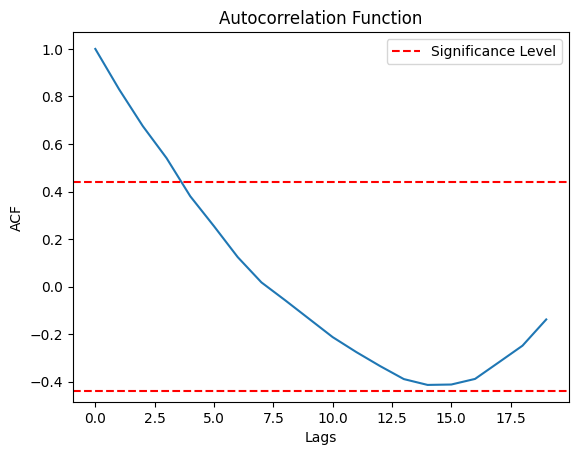

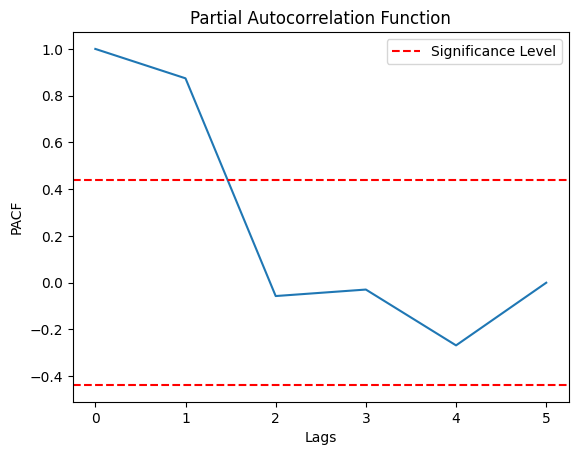

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

# Sample data (replace with your actual time series)
data = pd.Series([10, 12, 15, 13, 18, 20, 22, 25, 23, 28, 30, 27, 32, 35, 38, 40, 42, 45, 48, 50])
data.index = pd.date_range(start='2023-01-01', periods=20)  # Assuming daily data

# Calculate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
acf_values = acf(data, nlags=20)  # Analyze up to 20 lags
# pacf_values = pacf(data, nlags=20)  # Analyze up to 20 lags
pacf_values = pacf(data, nlags=5)  # Analyze up to 5 lags


# Plot ACF and PACF to visualize potential change points
import matplotlib.pyplot as plt

plt.plot(acf_values)
plt.axhline(y=1.96/np.sqrt(len(data)), color='red', linestyle='--', label='Significance Level')
plt.axhline(y=-1.96/np.sqrt(len(data)), color='red', linestyle='--')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.legend()
plt.show()

plt.plot(pacf_values)
plt.axhline(y=1.96/np.sqrt(len(data)), color='red', linestyle='--', label='Significance Level')
plt.axhline(y=-1.96/np.sqrt(len(data)), color='red', linestyle='--')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.legend()
plt.show()

# Identify potential change points based on ACF and PACF plots
# Look for a sharp drop in ACF values or a significant spike in PACF values after a lag

# Example: Based on the plots, a potential change point could be around lag 10 (around October 10th, 2023)

# Further analysis (optional):
# - Use statistical tests like the CUSUM test or the Chow test to confirm the identified change points.
# - Segment your data based on the change points and analyze each segment separately.



A change point in a time series refers to a specific time or period where the underlying data-generating process undergoes a significant shift or change. Detecting change points can be useful for identifying structural changes, anomalies, or shifts in patterns within the time series data.

Here's a simple Python example using the `ruptures` library to detect change points in a synthetic time series:

First, install the `ruptures` library if you haven't already:

```bash
pip install ruptures
```

Now, let's generate a synthetic time series with a change point and then detect the change point using the `ruptures` library:

In this example:
- We generate synthetic time series data with a change point where the mean shifts from 0 to 5.
- We plot the synthetic time series data to visualize the change point.
- We use the `ruptures` library to detect change points in the time series data using the Pelt method (Pruned Exact Linear Time).
- We plot the detected change points on the original time series plot.
- Finally, we print the detected change points.

You can adjust the parameters of the synthetic data and the change point detection algorithm as needed for your specific use case.

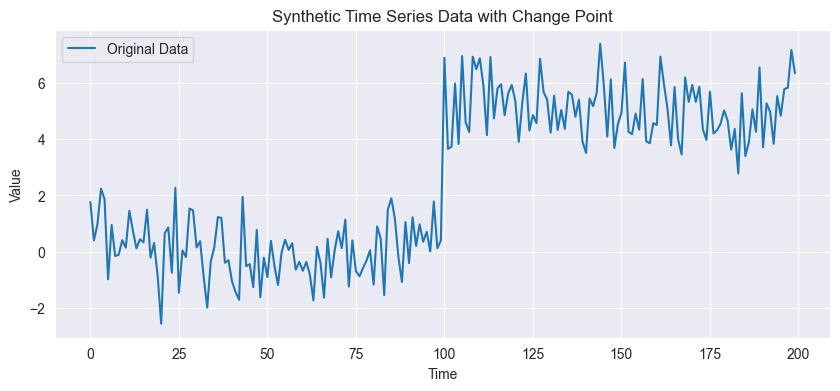

<Figure size 1000x400 with 0 Axes>

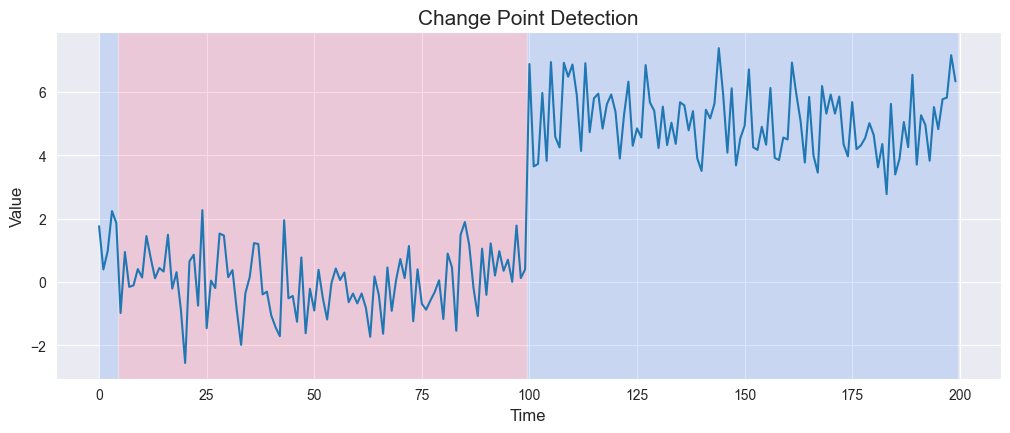

Detected change points: [5, 100, 200]


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ruptures as rpt

# Generate synthetic time series data with a change point
np.random.seed(0)
n_samples = 200
time = np.arange(n_samples)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=n_samples // 2),
                       np.random.normal(loc=5, scale=1, size=n_samples // 2)])

# Plot the synthetic time series data
plt.figure(figsize=(10, 4))
plt.plot(time, data, label='Original Data')
plt.title('Synthetic Time Series Data with Change Point')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Detect change points using the Pelt method
model = "l2"  # l1: linear, l2: quadratic
algo = rpt.Pelt(model=model).fit(data)
result = algo.predict(pen=10)

# Plot the detected change points
plt.figure(figsize=(10, 4))
sns.set_style("dark")
rpt.display(data, result, figsize=(10, 4))
plt.title('Change Point Detection', size=15)
plt.xlabel('Time', size=12)
plt.ylabel('Value', size=12)
plt.grid(True)
plt.show()

# Print the detected change points
print("Detected change points:", result)
